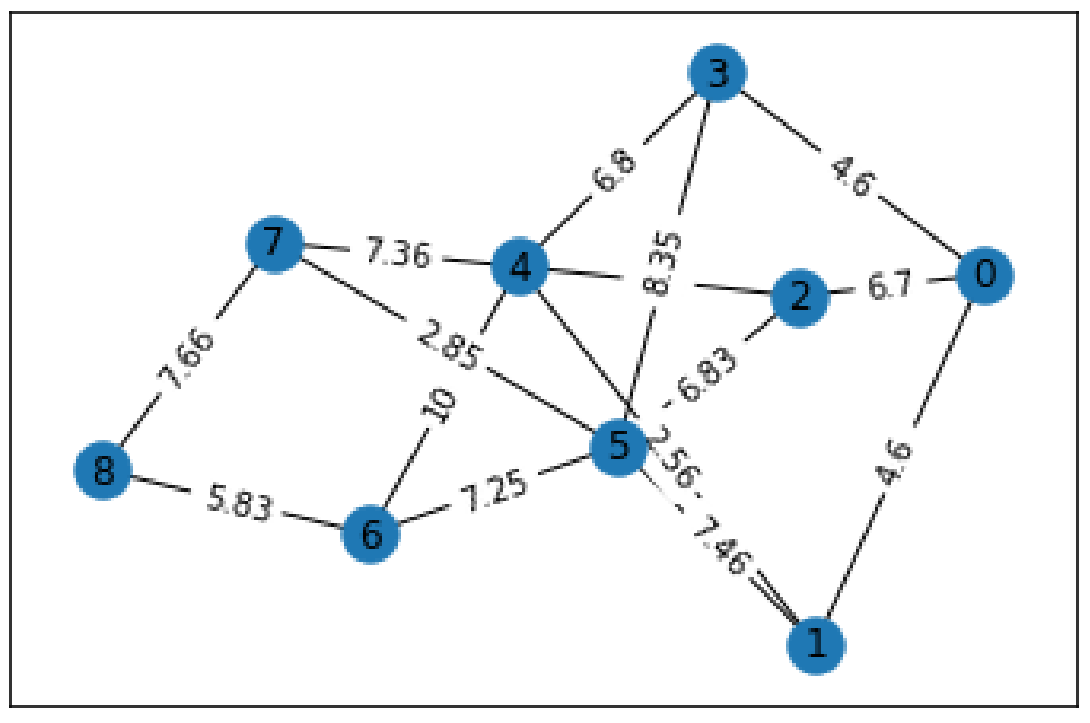

**1. We need to help Bidyut to plan the shortest path in his journey to save his petrol
expenses. Implement the above code to find shortest distance from Siliguri to every city. (Hint: use adjacency
matrix as data structure).**

In [30]:
import sys  # for storing large number

def dijkstra(graph, source):
    # Number of vertices in the graph
    vertices = 9

    # Initialize a list of distances from source to all other vertices as large number
    dist = [sys.maxsize] * vertices

    # Initialize distance of source vertex from itself as 0
    dist[source] = 0

    # Initialize list to keep track of visited vertices
    visited = [False] * vertices

    # Loop to find shortest path for all vertices
    for _ in range(vertices):
        # Find the vertex with the minimum distance value, which has not been visited yet
        min_dist = sys.maxsize
        min_dist_index = 0
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        # Mark the minimum distance vertex as visited
        visited[min_dist_index] = True

        # Update the distance value of the adjacent vertices of the picked vertex
        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and \
                    dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]

    return dist

In [31]:
adjacency_matrix=[[0,4.6,6.7,4.6,0,0,0,0,0],
                  [4.6,0,0,0,2.56,7.46,0,0,0],
                  [6.7,0,0,0,5.4,6.83,0,0,0],
                  [4.6,0,0,0,6.8,8.35,0,0,0],
                  [0,2.56,5.4,6.8,0,0,10,7.36,0],
                  [0,7.46,6.83,8.35,0,0,7.25,2.85,0],
                  [0,0,0,0,10,7.25,0,0,5.83],
                  [0,0,0,0,7.36,2.85,0,0,7.66],
                  [0,0,0,0,0,0,5.83,7.66,0]]


In [32]:
dijkstra(adjacency_matrix,0)

[0, 4.6, 6.7, 4.6, 7.16, 12.059999999999999, 17.16, 14.52, 22.18]

**2. Backtrack to find the shortest path from Siliguri to Mumbai using the above result. You can design a code for
backtracking for full marks.**


In [33]:
def dijkstra_with_predecessor(graph, source):
    vertices = 9

    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices
    predecessor = [-1] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = 0
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True

        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]
                predecessor[v] = min_dist_index

    return dist, predecessor

def shortest_path(source, target, predecessor):
    path = []
    while target != source:
        path.append(target)
        target = predecessor[target]
    path.append(source)
    path.reverse()
    return path

# Find the shortest distances and predecessors using Dijkstra's algorithm
shortest_distances, predecessors = dijkstra_with_predecessor(adjacency_matrix, 0)

# Find the shortest path from Siliguri (0) to Mumbai (8)
source = 0  # Siliguri
target = 8  # Mumbai
shortest_path_to_mumbai = shortest_path(source, target, predecessors)

print("Shortest path from Siliguri to Mumbai:", shortest_path_to_mumbai)
print("Shortest distance from Siliguri to Mumbai:",shortest_distances[8])


Shortest path from Siliguri to Mumbai: [0, 1, 4, 7, 8]
Shortest distance from Siliguri to Mumbai: 22.18


**Therefore Bidyut travelling path will be Siliguri -> Patna -> Varanasi -> Nagpur -> Mumbai**

**3. After reaching the second night in the city given by (1), Bidyut learnt from the news that there is roadblock in
the path from Varanasi(4) to Nagpur(7). Does his shortest path change ? If yes, what is his new shortest path?**

In [34]:
new_adjacency_matrix=[[0,4.6,6.7,4.6,0,0,0,0,0],
                  [4.6,0,0,0,2.56,7.46,0,0,0],
                  [6.7,0,0,0,5.4,6.83,0,0,0],
                  [4.6,0,0,0,6.8,8.35,0,0,0],
                  [0,2.56,5.4,6.8,0,0,10,0,0],
                  [0,7.46,6.83,8.35,0,0,7.25,2.85,0],
                  [0,0,0,0,10,7.25,0,0,5.83],
                  [0,0,0,0,0,2.85,0,0,7.66],
                  [0,0,0,0,0,0,5.83,7.66,0]]

In [35]:
shortest_distances, predecessors = dijkstra_with_predecessor(new_adjacency_matrix, 1)

# Find the shortest path from patna (1) to Mumbai (8)
source = 1  # Patna
target = 8  # Mumbai
new_shortest_path_to_mumbai = shortest_path(source, target, predecessors)

print("Shortest path from Patna to Mumbai:", new_shortest_path_to_mumbai)
print('Shortest distance',shortest_distances[8]+new_adjacency_matrix[0][1])  #also adding the distance from Siliguri to Patna

Shortest path from Patna to Mumbai: [1, 5, 7, 8]
Shortest distance 22.57


**After knowing t there is roadblock in
the path from Varanasi(4) to Nagpur(7), Bidyut travelling path will be Siliguri -> Patna -> Rajpur -> Nagpur -> Mumbai**

**4. Seeing his WhatsApp status of travel, Bidyut received a call from his friend in Bhopal that he can spend the
fourth night in Bhopal if he wants. Does his optimal path now change? If yes, What is his new optimal path
and distance? (Distances from Varanasi:Bhopal = 770 km Raipur:Bhopal = 622 km Bhopal:Mumbai = 760 km)
(Note: Using a backtracking code for 2,3,4 correctly will result in full marks)**

Phone call of Bhopal friend received

**Case 1**: While in Siliguri

In [36]:
new_adjacency_matrix1  =   [[0,4.6,6.7,4.6,0,0,0,0,0,0],
                  [4.6,0,0,0,2.56,7.46,0,0,0,0],
                  [6.7,0,0,0,5.4,6.83,0,0,0,0],
                  [4.6,0,0,0,6.8,8.35,0,0,0,0],
                  [0,2.56,5.4,6.8,0,0,10,7.36,0,7.7],
                  [0,7.46,6.83,8.35,0,0,7.25,2.85,0,6.22],
                  [0,0,0,0,10,7.25,0,0,5.83,0],
                  [0,0,0,0,7.36,2.85,0,0,7.66,0],
                  [0,0,0,0,0,0,5.83,7.66,0,7.6],
                  [0,0,0,0,7.7,6.22,0,0,7.6,0]]

In [37]:
def dijkstra_with_predecessor1(graph, source):
    vertices = 10

    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices
    predecessor = [-1] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = 0
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True

        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]
                predecessor[v] = min_dist_index

    return dist, predecessor

In [38]:
shortest_distances, predecessors = dijkstra_with_predecessor1(new_adjacency_matrix1, 0)

# Find the shortest path from Siliguri (0) to Bhopal (9)
source = 0  # Siliguri
target = 8  # Bhopal
shortest_path_to_bhopal = shortest_path(source, target, predecessors)

# Find the shortest path from Bhopal (9)) to Mumbai (8)
# shortest_distances1, predecessors1 = dijkstra_with_predecessor1(new_adjacency_matrix1, 9)
# source1 = 9  # Siliguri
# target1 = 8  # Bhopal
# bhopal_path_to_mumbai = shortest_path(source1, target1, predecessors1)

print("Shortest path from Siliguri to Bhopal:", shortest_path_to_bhopal)
print('-----------------------------------------------------------------------')
#print("Shortest path from Bhopal to Mumbai:", bhopal_path_to_mumbai)
#print('-----------------------------------------------------------------------')

print('Shortest_distance',shortest_distances[8])

Shortest path from Siliguri to Bhopal: [0, 1, 4, 7, 8]
-----------------------------------------------------------------------
Shortest_distance 22.18


****Here the optimal path won't change. Bidyut travelling path will be Siliguri -> Patna -> Varanasi -> Nagpur -> Mumbai****

##**Case 2**: While in second night according to 2.1 before news.

In [39]:
shortest_distances, predecessors = dijkstra_with_predecessor1(new_adjacency_matrix1, 1)

# Find the shortest path from Siliguri (0) to Bhopal (9)
source = 1  # Patna
target = 8  # Bhopal
shortest_path_to_mumbai = shortest_path(source, target, predecessors)

# Find the shortest path from Bhopal (9)) to Mumbai (8)
# shortest_distances1, predecessors1 = dijkstra_with_predecessor1(new_adjacency_matrix1, 9)
# source1 = 9  # Siliguri
# target1 = 8  # Bhopal
# bhopal_path_to_mumbai = shortest_path(source1, target1, predecessors1)

print("Shortest path from Siliguri to Mumbai:", shortest_path_to_mumbai)
print('-----------------------------------------------------------------------')
#print("Shortest path from Bhopal to Mumbai:", bhopal_path_to_mumbai)
#print('-----------------------------------------------------------------------')

print('Shortest_distance',shortest_distances[8]+new_adjacency_matrix1[0][1])

Shortest path from Siliguri to Mumbai: [1, 4, 7, 8]
-----------------------------------------------------------------------
Shortest_distance 22.18


****Here the optimal path won't change. Bidyut travelling path will be Siliguri -> Patna -> Varanasi -> Nagpur -> Mumbai****

##**Case 3**: While in second night according to 2.1 after news.

In [40]:
# COnsidering there is a roadblock between 4 and 7
new_adjacency_matrix1  =   [[0,4.6,6.7,4.6,0,0,0,0,0,0],
                  [4.6,0,0,0,2.56,7.46,0,0,0,0],
                  [6.7,0,0,0,5.4,6.83,0,0,0,0],
                  [4.6,0,0,0,6.8,8.35,0,0,0,0],
                  [0,2.56,5.4,6.8,0,0,10,0,0,7.7],
                  [0,7.46,6.83,8.35,0,0,7.25,2.85,0,6.22],
                  [0,0,0,0,10,7.25,0,0,5.83,0],
                  [0,0,0,0,0,2.85,0,0,7.66,0],
                  [0,0,0,0,0,0,5.83,7.66,0,7.6],
                  [0,0,0,0,7.7,6.22,0,0,7.6,0]]            # Bhopal(9)

In [41]:
shortest_distances, predecessors = dijkstra_with_predecessor1(new_adjacency_matrix1, 1)

# Find the shortest path from patna (1) to Mumbai (8)
source = 1  # patna
target = 8  # Mumbai
shortest_path_to_mumbai = shortest_path(source, target, predecessors)


print("Shortest path from Siliguri to Mumbai:", shortest_path_to_mumbai)
print('Shortest_distance',shortest_distances[8] + new_adjacency_matrix1[0][1])

Shortest path from Siliguri to Mumbai: [1, 4, 9, 8]
Shortest_distance 22.46


Thus here Bidyut optimal path will change and it will be **Siliguri -> Patna -> Varanasi -> Bhopal -> Mumbai**